In [57]:
import pandas as pd
import supy as sp
import matplotlib.pyplot as plt
from functions.night import *
from functions.dict_legend import *
in_folder = '../data/'
sp.show_version()

SuPy version: 2023.7.3.dev0
-------------


In [59]:
s_rc = in_folder + 'sample_data/RunControl.nml'         # OHM. Sampledata Q* modelled with L↓ modelled using air temperature and relative humidity supplied in meteorological forcing file [Loridan et al., 2011]. Zenith angle not accounted for in albedo calculation.d
s2_rc = in_folder + 'sample_data2/RunControl.nml'       # Sampledata SpartacusESTM, standard values in GridLayout
s3_rc = in_folder + 'sample_data3/RunControl.nml'       # Sampledata SpartacusESTM Thicker first layer wall all three layers. 1.2 instad of .2
s3x_rc = in_folder + 'sample_data3x/RunControl.nml'     # Sampledata SpartacusESTM Thicker first layer wall all three layers. 1.2 and 1.1 on second layer
s4_rc = in_folder + 'sample_data4/RunControl.nml'       # Sampledata SpartacusESTM wall albedo lowered .25 instad of .5
s5_rc = in_folder + 'sample_data5/RunControl.nml'       # Sampledata SpartacusESTM wall emissivity lower .9 instead of .95
s6_rc = in_folder + 'sample_data6/RunControl.nml'       # Sampledata SpartacusESTM Thermal conductivity of layer 1 lower. .8 instead of 1.2
s7_rc = in_folder + 'sample_data7/RunControl.nml'       # Sampledata SpartacusESTM Thermal conductivity of layer 2 (insulation) lower. .2 instead of 1.2

df_state_init_s = sp.init_supy(s_rc)
df_state_init_s2 = sp.init_supy(s2_rc)
df_state_init_s3 = sp.init_supy(s3_rc)
df_state_init_s3x = sp.init_supy(s3x_rc)
df_state_init_s4 = sp.init_supy(s4_rc)
df_state_init_s5 = sp.init_supy(s5_rc)
df_state_init_s6 = sp.init_supy(s6_rc)
df_state_init_s7 = sp.init_supy(s7_rc)

2024-02-09 09:59:41,933 - SuPy - INFO - All cache cleared.
2024-02-09 09:59:43,463 - SuPy - INFO - All cache cleared.
2024-02-09 09:59:45,130 - SuPy - INFO - All cache cleared.
2024-02-09 09:59:46,617 - SuPy - INFO - All cache cleared.
2024-02-09 09:59:48,036 - SuPy - INFO - All cache cleared.
2024-02-09 09:59:49,473 - SuPy - INFO - All cache cleared.
2024-02-09 09:59:50,906 - SuPy - INFO - All cache cleared.
2024-02-09 09:59:52,311 - SuPy - INFO - All cache cleared.


In [60]:
# standard settings
print(df_state_init_s.columns.tolist())
df_state_init_s.filter(like='sfr')


[('ah_min', '(0,)'), ('ah_min', '(1,)'), ('ah_slope_cooling', '(0,)'), ('ah_slope_cooling', '(1,)'), ('ah_slope_heating', '(0,)'), ('ah_slope_heating', '(1,)'), ('ahprof_24hr', '(0, 0)'), ('ahprof_24hr', '(0, 1)'), ('ahprof_24hr', '(1, 0)'), ('ahprof_24hr', '(1, 1)'), ('ahprof_24hr', '(2, 0)'), ('ahprof_24hr', '(2, 1)'), ('ahprof_24hr', '(3, 0)'), ('ahprof_24hr', '(3, 1)'), ('ahprof_24hr', '(4, 0)'), ('ahprof_24hr', '(4, 1)'), ('ahprof_24hr', '(5, 0)'), ('ahprof_24hr', '(5, 1)'), ('ahprof_24hr', '(6, 0)'), ('ahprof_24hr', '(6, 1)'), ('ahprof_24hr', '(7, 0)'), ('ahprof_24hr', '(7, 1)'), ('ahprof_24hr', '(8, 0)'), ('ahprof_24hr', '(8, 1)'), ('ahprof_24hr', '(9, 0)'), ('ahprof_24hr', '(9, 1)'), ('ahprof_24hr', '(10, 0)'), ('ahprof_24hr', '(10, 1)'), ('ahprof_24hr', '(11, 0)'), ('ahprof_24hr', '(11, 1)'), ('ahprof_24hr', '(12, 0)'), ('ahprof_24hr', '(12, 1)'), ('ahprof_24hr', '(13, 0)'), ('ahprof_24hr', '(13, 1)'), ('ahprof_24hr', '(14, 0)'), ('ahprof_24hr', '(14, 1)'), ('ahprof_24hr', '(1

var     sfr_surf                                  
ind_dim     (0,)  (1,) (2,)  (3,)  (4,) (5,)  (6,)
grid                                              
1           0.43  0.38  0.0  0.02  0.03  0.0  0.14

In [61]:
# standard wall thickness
df_state_init_s2.loc[:, 'dz_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,0.2,0.1,0.1,0.01,0.01,0.2,0.1,0.1,0.01,0.01,0.2,0.1,0.1,0.01,0.01


In [62]:
# standard wall cp
df_state_init_s2.loc[:, 'cp_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,3000000.0,2000000.0,2000000.0,2000000.0,2000000.0,2000000.0,3000000.0,2000000.0,2000000.0,2000000.0,2000000.0,3000000.0,2000000.0,2000000.0,2000000.0


In [63]:
# standard wall k
df_state_init_s2.loc[:, 'k_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2


In [66]:
# wall with new k in insulation layer (2)
df_state_init_s7.loc[:, 'k_wall']

ind_dim,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(1, 0)","(1, 1)","(1, 2)","(1, 3)","(1, 4)","(2, 0)","(2, 1)","(2, 2)","(2, 3)","(2, 4)"
grid,,,,,,,,,,,,,,,
1,1.2,0.2,1.2,1.2,1.2,1.2,0.2,1.2,1.2,1.2,1.2,0.2,1.2,1.2,1.2


In [67]:
# Metdata 
grid = df_state_init_s.index[0]
df_forcing = sp.load_forcing_grid(s_rc, grid)
s = '2012 07 1'
s2 = '2012 07 10'
e = '2012 07 31'

# # warm week 2012  to reduce time for test setup
df_forcing=df_forcing.loc[s: e].iloc[1:]
df_forcing2=df_forcing.loc[s2: e].iloc[1:]


2024-02-09 10:00:57,338 - SuPy - INFO - All cache cleared.


In [124]:
#df_forcing

In [30]:
df_output_s2, df_state_final_s2 = sp.run_supy(df_forcing, df_state_init_s2)
df_output_s2b, df_state_final_s2b = sp.run_supy(df_forcing2, df_state_init_s2)

2024-02-08 15:30:11,171 - SuPy - INFO - ====================
2024-02-08 15:30:11,172 - SuPy - INFO - Simulation period:
2024-02-08 15:30:11,173 - SuPy - INFO -   Start: 2012-07-01 00:05:00
2024-02-08 15:30:11,174 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-08 15:30:11,175 - SuPy - INFO - 
2024-02-08 15:30:11,176 - SuPy - INFO - No. of grids: 1
2024-02-08 15:30:11,176 - SuPy - INFO - SuPy is running in serial mode
2024-02-08 15:36:02,551 - SuPy - INFO - Execution time: 351.4 s
2024-02-08 15:36:02,552 - SuPy - INFO - ====================

2024-02-08 15:36:02,553 - SuPy - INFO - ====================
2024-02-08 15:36:02,554 - SuPy - INFO - Simulation period:
2024-02-08 15:36:02,556 - SuPy - INFO -   Start: 2012-07-10 00:05:00
2024-02-08 15:36:02,557 - SuPy - INFO -   End: 2012-07-31 23:55:00
2024-02-08 15:36:02,558 - SuPy - INFO - 
2024-02-08 15:36:02,560 - SuPy - INFO - No. of grids: 1
2024-02-08 15:36:02,562 - SuPy - INFO - SuPy is running in serial mode
2024-02-08 15:40:09,083 - 

<AxesSubplot:xlabel='datetime'>

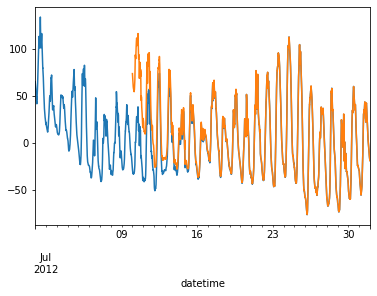

In [33]:
# check spin-up time
df_output_s2.SUEWS.loc[grid].loc[:,'QS'].plot()
df_output_s2b.SUEWS.loc[grid].loc[:,'QS'].plot()

2024-02-09 15:38:42,627 - SuPy - INFO - All cache cleared.


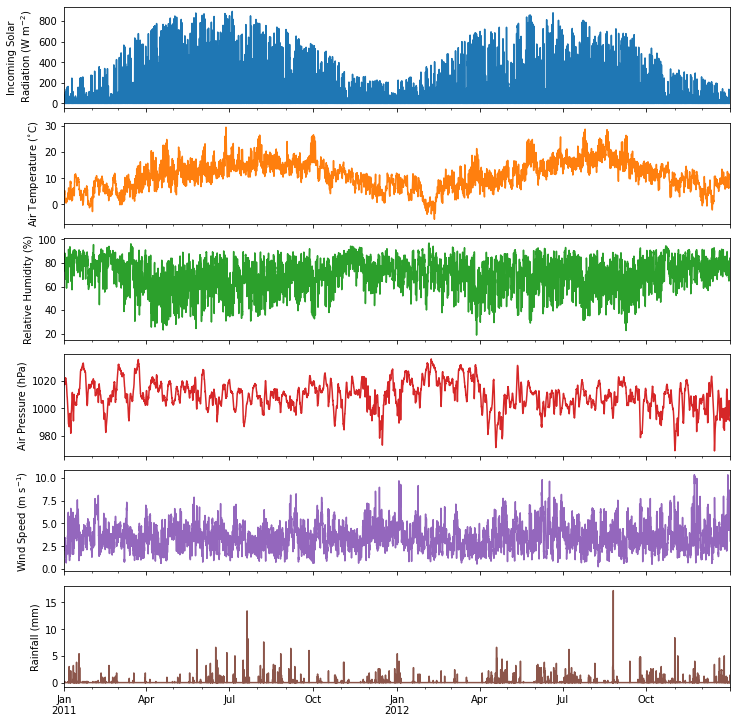

In [116]:
#load full dataset again
df_forcing = sp.load_forcing_grid(s_rc, grid)


# plot forcing data
df_plot_forcing_x = df_forcing.loc[:, list_var_forcing].copy().shift(
    -1).dropna(how='any')
df_plot_forcing = df_plot_forcing_x.resample('1h').mean()
df_plot_forcing['rain'] = df_plot_forcing_x['rain'].resample('1h').sum()

axes = df_plot_forcing.plot(
    subplots=True,
    figsize=(10, 12),
    legend=False,
)
fig = axes[0].figure
fig.tight_layout()
fig.autofmt_xdate(bottom=0.2, rotation=0, ha='center')
for ax, var in zip(axes, list_var_forcing):
    ax.set_ylabel(dict_var_label[var])

# Run

In [117]:
df_output_s, df_state_final_s = sp.run_supy(df_forcing, df_state_init_s)
df_output_s2, df_state_final_s2 = sp.run_supy(df_forcing, df_state_init_s2)
df_output_s3, df_state_final_s3 = sp.run_supy(df_forcing, df_state_init_s3)
df_output_s3x, df_state_final_s3x = sp.run_supy(df_forcing, df_state_init_s3x)
df_output_s4, df_state_final_s4 = sp.run_supy(df_forcing, df_state_init_s4)
df_output_s5, df_state_final_s5 = sp.run_supy(df_forcing, df_state_init_s5)
df_output_s6, df_state_final_s6 = sp.run_supy(df_forcing, df_state_init_s6)
df_output_s7, df_state_final_s7 = sp.run_supy(df_forcing, df_state_init_s7)

2024-02-09 15:39:26,129 - SuPy - INFO - ====================
2024-02-09 15:39:26,130 - SuPy - INFO - Simulation period:
2024-02-09 15:39:26,131 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2024-02-09 15:39:26,133 - SuPy - INFO -   End: 2013-01-01 00:00:00
2024-02-09 15:39:26,134 - SuPy - INFO - 
2024-02-09 15:39:26,135 - SuPy - INFO - No. of grids: 1
2024-02-09 15:39:26,136 - SuPy - INFO - SuPy is running in serial mode
2024-02-09 15:41:24,416 - SuPy - INFO - Execution time: 118.3 s
2024-02-09 15:41:24,417 - SuPy - INFO - ====================

2024-02-09 15:41:24,418 - SuPy - INFO - ====================
2024-02-09 15:41:24,419 - SuPy - INFO - Simulation period:
2024-02-09 15:41:24,420 - SuPy - INFO -   Start: 2011-01-01 00:05:00
2024-02-09 15:41:24,421 - SuPy - INFO -   End: 2013-01-01 00:00:00
2024-02-09 15:41:24,423 - SuPy - INFO - 
2024-02-09 15:41:24,424 - SuPy - INFO - No. of grids: 1
2024-02-09 15:41:24,425 - SuPy - INFO - SuPy is running in serial mode
2024-02-09 17:44:46,788 - 

In [222]:
# Start and end date for inspection
s = '2012-07-1'
e = '2012-07-30'

# OHM
# Spartacus_2           Sampledata Spartacus, standard values in GridLayout
# Spartacus_3           Sampledata Spartacus Thicker first layer wall all three layers. 1.2 instad of .2
# Spartacus_3x          Sampledata Spartacus Thicker first layer wall all three layers. 1.2 and 1.1 on second layer
# Spartacus_4           Sampledata Spartacus wall albedo lowered .25 instad of .5
# Spartacus_5           Sampledata Spartacus wall emissivity lower .9 instead of .95
# Spartacus_6           Sampledata Spartacus Thermal conductivity of layer 1 lower. .8 instead of 1.2
# Spartatus_7           Sampledata Spartacus Thermal conductivity of layer 2 lower. .2 instead of 1.2

outputIn = [df_output_s.loc[grid].loc[s:e,:],df_output_s2.loc[grid].loc[s:e,:], df_output_s3.loc[grid].loc[s:e,:], df_output_s3x.loc[grid].loc[s:e,:],df_output_s4.loc[grid].loc[s:e,:], df_output_s5.loc[grid].loc[s:e,:], df_output_s6.loc[grid].loc[s:e,:], df_output_s7.loc[grid].loc[s:e,:], ]
namesIn = ['OHM', 'SS_default_alb0.5_emis0.95_k1.2', 'SS_thickerwallAll', 'SS_thickerwallVary','SS_alb0.25', 'SS_emis0.90','SS_k0.8first', 'SS_k0.2second',]
df_output_merge_x=pd.concat(outputIn,axis=1,join='inner', keys = namesIn).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1) #.loc[grid]
df_merge=df_output_merge_x.SUEWS

outputInNoOHM = [df_output_s2.loc[grid].loc[s:e,:], df_output_s3.loc[grid].loc[s:e,:], df_output_s3x.loc[grid].loc[s:e,:],df_output_s4.loc[grid].loc[s:e,:], df_output_s5.loc[grid].loc[s:e,:], df_output_s6.loc[grid].loc[s:e,:], df_output_s7.loc[grid].loc[s:e,:], ]
namesInNoOHM = ['SS_default_alb0.5_emis0.95_k1.2', 'SS_thickerwallAll', 'SS_thickerwallVary','SS_alb0.25', 'SS_emis0.90','SS_k0.8first', 'SS_k0.2second',]
df_output_merge_xNOOHM=pd.concat(outputInNoOHM,axis=1,join='inner', keys = namesInNoOHM).swaplevel(0,-1,axis=1).swaplevel(0,1,axis=1).sort_index(axis=1) #.loc[grid]
df_mergeNoOHM=df_output_merge_xNOOHM.SUEWS

# add available energy, AE
df_merge=df_merge.stack().eval('AE=QN+QF-QS').unstack()

#df_merge = merge_output([df_output_s2, df_output_s3, df_output_s3x,df_output_s4, df_output_s5, df_output_s6, df_output_s7, ], ['Spartacus_2', 'Spartacus_3', 'Spartacus_3x','Spartacus_4', 'Spartacus_5','Spartacus_6', 'Spartacus_7',])

# Plot

In [248]:
# Start and end date for inspection
s = '2012-07-21'
e = '2012-07-30'

In [246]:
df_merge = df_merge.stack().eval('BowenRatio=QH/QE').unstack()
df_merge = df_merge.stack().eval('QS_f=QS/(QN+QF)').unstack()
df_merge = df_merge.stack().eval('QH_f=QH/(QN+QF)').unstack()
df_merge = df_merge.stack().eval('QE_f=QE/(QN+QF)').unstack()


<AxesSubplot:title={'center':'Qs for one warm week in July'}, xlabel='datetime'>

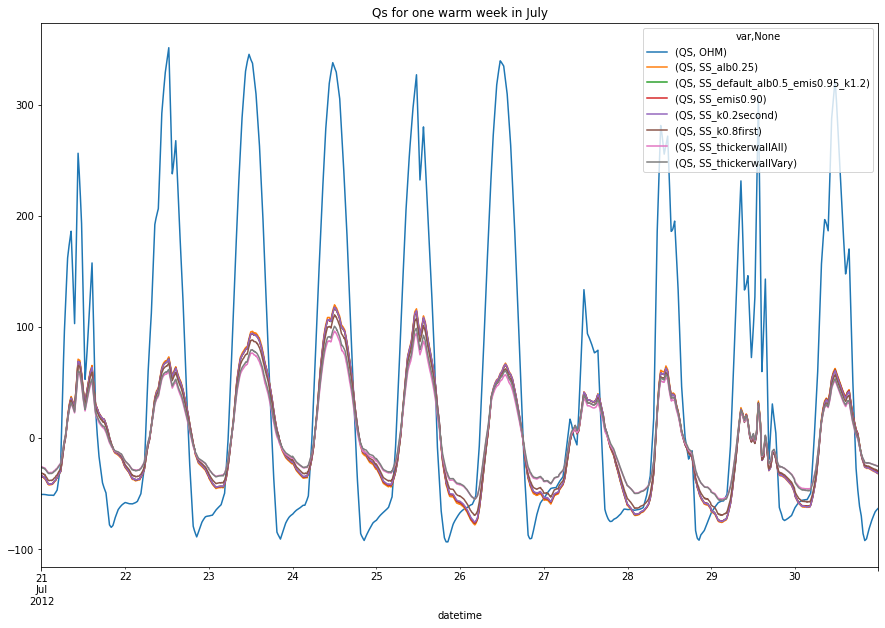

In [253]:
var = 'QS'

df_merge.loc[s:e,[var]].plot(figsize=(15,10), title='Qs for one warm week in July')

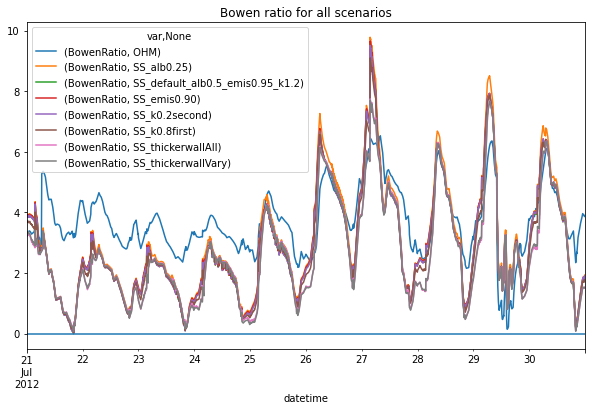

In [255]:
var = 'BowenRatio'

# s = '2012-07-28 15:00'
# e = '2012-07-28 17:00'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6), title='Bowen ratio for all scenarios')
# df_merge.loc[s:e,[var]]

ax.axhline(0,0)

var                 BowenRatio                                             \
                           OHM SS_alb0.25 SS_default_alb0.5_emis0.95_k1.2   
datetime                                                                    
2012-07-26 00:00:00   2.617762   2.184051                        2.168199   
2012-07-26 00:05:00   2.607793   2.232243                        2.171995   
2012-07-26 00:10:00   2.597714   2.239191                        2.182864   
2012-07-26 00:15:00   2.587513   2.251622                        2.190039   
2012-07-26 00:20:00   2.577177   2.255733                        2.197390   
...                        ...        ...                             ...   
2012-07-30 23:35:00   3.889123   1.852650                        1.786593   
2012-07-30 23:40:00   3.879673   1.850598                        1.789194   
2012-07-30 23:45:00   3.870309   1.852055                        1.837164   
2012-07-30 23:50:00   3.861020   1.906274                        1.800010   
2012-07-30 23:55:00   3.895881   1.931544                        1.864433   

var                                                                           \
                    SS_emis0.90 SS_k0.2second SS_k0.8first SS_thickerwallAll   
datetime                                                                       
2012-07-26 00:00:00    2.189021      2.131651     1.956759          1.566959   
2012-07-26 00:05:00    2.193483      2.138701     1.958024          1.561927   
2012-07-26 00:10:00    2.204683      2.142203     1.961773          1.559235   
2012-07-26 00:15:00    2.208660      2.147600     1.966052          1.556917   
2012-07-26 00:20:00    2.214782      2.154068     1.974537          1.554642   
...                         ...           ...          ...               ...   
2012-07-30 23:35:00    1.861960      1.870759     1.709866          1.505843   
2012-07-30 23:40:00    1.824189      1.874574     1.707106          1.502959   
2012-07-30 23:45:00    1.822123      1.836804     1.706914          1.495394   
2012-07-30 23:50:00    1.867117      1.834493     1.707849          1.492990   
2012-07-30 23:55:00    1.893898      1.898752     1.773953          1.537238   

var                                     
                    SS_thickerwallVary  
datetime                                
2012-07-26 00:00:00           1.533989  
2012-07-26 00:05:00           1.529012  
2012-07-26 00:10:00           1.528021  
2012-07-26 00:15:00           1.525907  
2012-07-26 00:20:00           1.522858  
...                                ...  
2012-07-30 23:35:00           1.517712  
2012-07-30 23:40:00           1.515911  
2012-07-30 23:45:00           1.514113  
2012-07-30 23:50:00           1.507515  
2012-07-30 23:55:00           1.517116  

[1440 rows x 8 columns]

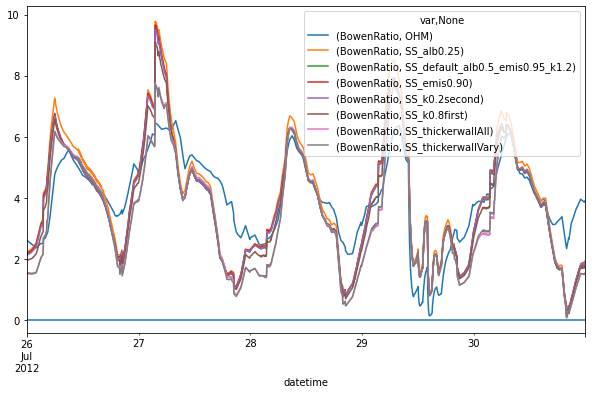

In [256]:
var = 'BowenRatio'
s = '2012-07-26'
e = '2012-07-30'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6))
ax.axhline(0,0)

df_merge.loc[s:e,[var]]


var                 BowenRatio                                             \
                           OHM SS_alb0.25 SS_default_alb0.5_emis0.95_k1.2   
datetime                                                                    
2012-07-26 18:30:00   3.582831   2.950921                        2.731013   
2012-07-26 18:35:00   3.562909   2.894625                        2.704648   
2012-07-26 18:40:00   3.541678   2.858198                        2.649987   
2012-07-26 18:45:00   3.519135   2.806029                        2.601874   
2012-07-26 18:50:00   3.474983   2.735974                        2.564405   
2012-07-26 18:55:00   3.449912   2.687782                        2.510364   
2012-07-26 19:00:00   3.423491   2.606831                        2.438353   

var                                                                           \
                    SS_emis0.90 SS_k0.2second SS_k0.8first SS_thickerwallAll   
datetime                                                                       
2012-07-26 18:30:00    2.748288      2.734598     2.739751          2.720704   
2012-07-26 18:35:00    2.722176      2.683249     2.695590          2.658459   
2012-07-26 18:40:00    2.667773      2.638334     2.647910          2.600586   
2012-07-26 18:45:00    2.619918      2.604080     2.585109          2.539178   
2012-07-26 18:50:00    2.569268      2.540921     2.528150          2.484799   
2012-07-26 18:55:00    2.514726      2.484676     2.467797          2.403112   
2012-07-26 19:00:00    2.455917      2.439639     2.417228          2.332078   

var                                     
                    SS_thickerwallVary  
datetime                                
2012-07-26 18:30:00           2.666381  
2012-07-26 18:35:00           2.604177  
2012-07-26 18:40:00           2.546351  
2012-07-26 18:45:00           2.496894  
2012-07-26 18:50:00           2.431069  
2012-07-26 18:55:00           2.349250  
2012-07-26 19:00:00           2.284688

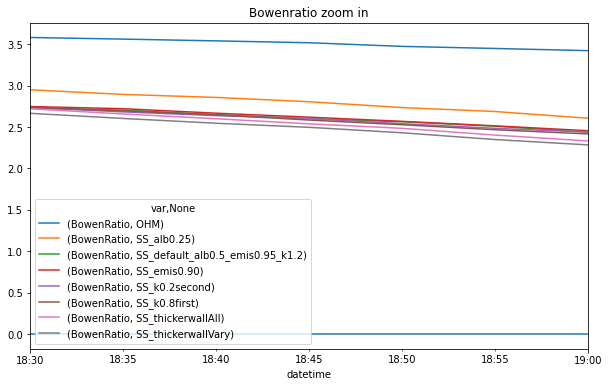

In [259]:
var = 'BowenRatio'

s = '2012-07-26 18:30'
e = '2012-07-26 19:00'

ax = df_merge.loc[s:e,[var]].plot(figsize=(10,6),title='Bowenratio zoom in')
ax.axhline(0,0)

df_merge.loc[s:e,[var]]

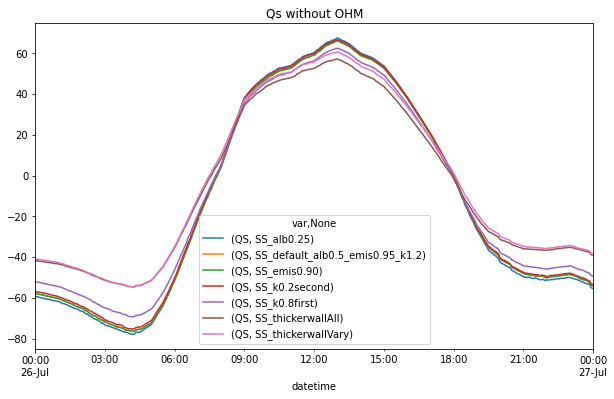

In [261]:
var = 'QS'

s = '2012-07-26 00:00'
e = '2012-07-27 00:00'

ax = df_mergeNoOHM.loc[s:e,[var]].plot(figsize=(10,6), title='Qs without OHM')



<AxesSubplot:xlabel='datetime'>

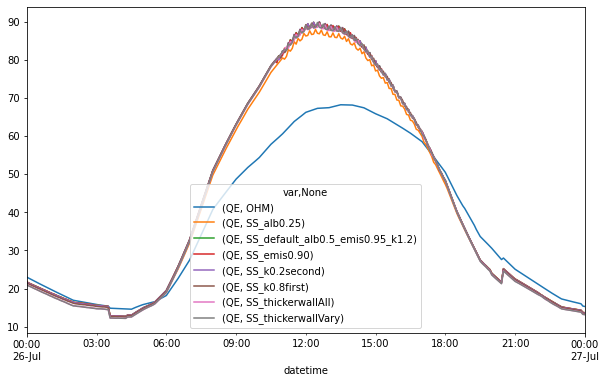

In [265]:
var = 'QE'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
#df_merge.loc[s:e,[var]]


<AxesSubplot:xlabel='datetime'>

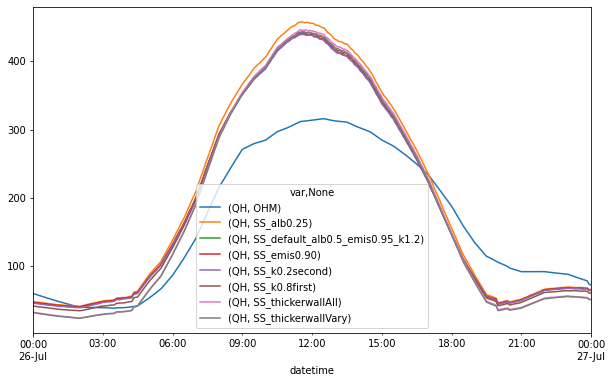

In [264]:
var = 'QH'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
#df_merge.loc['2012-07-24 11:00': '2012-07-24 11:30',[var]]


<AxesSubplot:xlabel='datetime'>

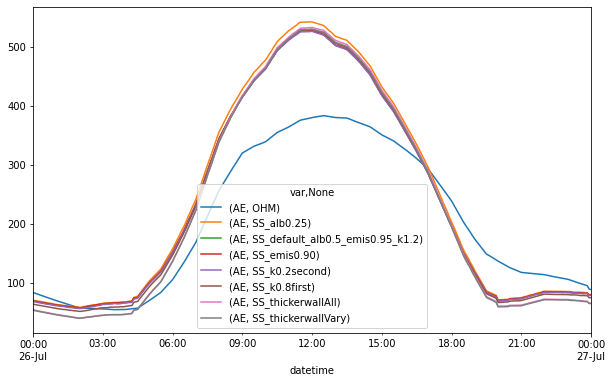

In [266]:
var = 'AE'

df_merge.loc[s:e,[var]].plot(figsize=(10,6))
#df_merge.loc['2012-07-24 11:00': '2012-07-24 11:30',[var]]


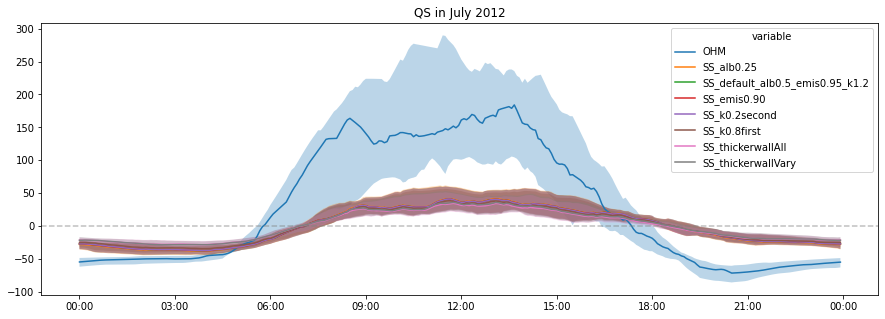

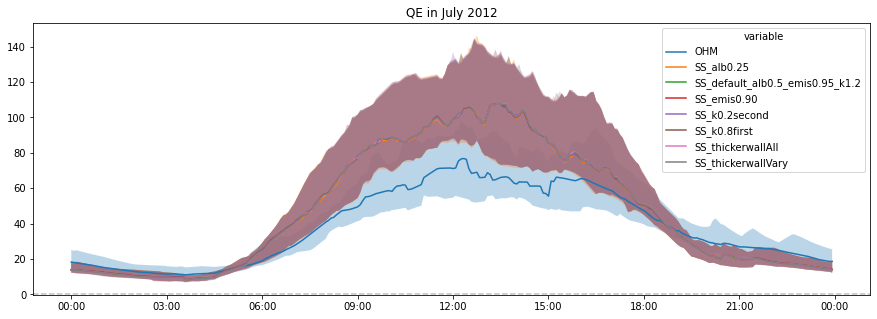

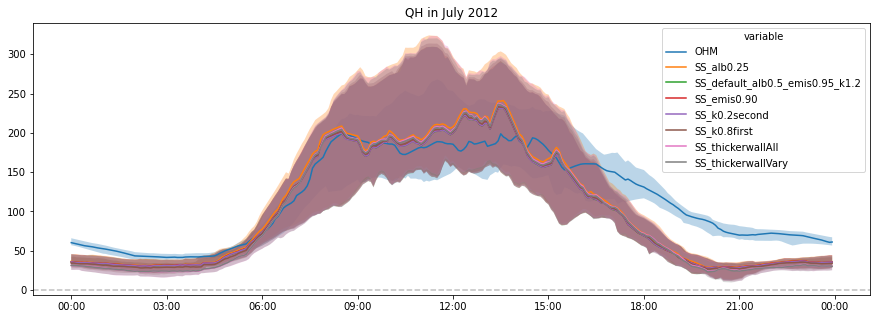

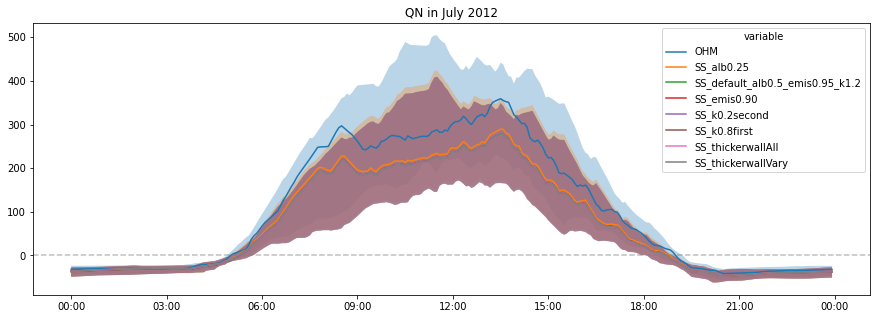

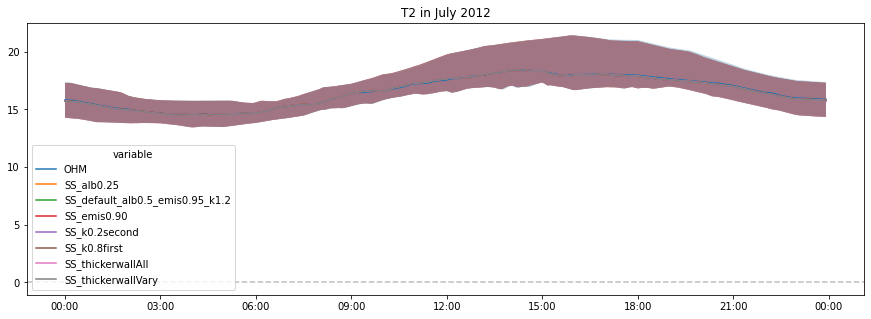

In [268]:

for var in ['QS','QE','QH', 'QN', 'T2']:
    fig, ax = plt.subplots(figsize=(15,5))
    fig,ax=sp.util.plot_day_clm(df_merge.loc['2012 7',var],fig=fig)
    _=ax.set_title(var + ' in July 2012')
    ax.axhline(0,0, linestyle = '--', color = 'grey', alpha = 0.5)
    



# Kville

In [3]:
kv_rc = in_folder + 'kville/RunControl.nml'        
kvt_rc = in_folder + 'kville_t/RunControl.nml'        

df_state_init_kv = sp.init_supy(kv_rc)
df_state_init_kvt = sp.init_supy(kvt_rc)


2023-08-31 15:52:30,361 - SuPy - INFO - All cache cleared.
2023-08-31 15:52:31,416 - SuPy - INFO - All cache cleared.


In [28]:
# Metdata 
grid = df_state_init_kv.index[1]
df_forcing = sp.load_forcing_grid(kv_rc, grid)

2023-08-31 15:58:28,036 - SuPy - INFO - All cache cleared.


In [29]:
df_forcing = df_forcing.loc['2018-05-28':'2018-06-05']

df_forcing

,iy,id,it,imin,qn,qh,qe,qs,qf,U,...,snow,ldown,fcld,Wuh,xsmd,lai,kdiff,kdir,wdir,isec
2018-05-28 00:00:00,2018,148,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,1.600000,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:05:00,2018,148,0,5,-999.0,-999.0,-999.0,-999.0,-999.0,1.558333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:10:00,2018,148,0,10,-999.0,-999.0,-999.0,-999.0,-999.0,1.516667,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:15:00,2018,148,0,15,-999.0,-999.0,-999.0,-999.0,-999.0,1.475000,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-05-28 00:20:00,2018,148,0,20,-999.0,-999.0,-999.0,-999.0,-999.0,1.433333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-05 23:35:00,2018,156,23,35,-999.0,-999.0,-999.0,-999.0,-999.0,1.108333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-06-05 23:40:00,2018,156,23,40,-999.0,-999.0,-999.0,-999.0,-999.0,1.066667,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-06-05 23:45:00,2018,156,23,45,-999.0,-999.0,-999.0,-999.0,-999.0,1.025000,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0
2018-06-05 23:50:00,2018,156,23,50,-999.0,-999.0,-999.0,-999.0,-999.0,0.983333,...,-999.0,-999.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0


In [30]:
df_output_kv, df_state_final_kv = sp.run_supy(df_forcing, df_state_init_kv)
df_output_kvt, df_state_final_kvt = sp.run_supy(df_forcing, df_state_init_kvt)

2023-08-31 15:58:41,529 - SuPy - INFO - ====================
2023-08-31 15:58:41,530 - SuPy - INFO - Simulation period:
2023-08-31 15:58:41,531 - SuPy - INFO -   Start: 2018-05-28 00:00:00
2023-08-31 15:58:41,531 - SuPy - INFO -   End: 2018-06-05 23:55:00
2023-08-31 15:58:41,533 - SuPy - INFO - 
2023-08-31 15:58:41,533 - SuPy - INFO - No. of grids: 15
2023-08-31 15:58:41,535 - SuPy - INFO - SuPy is running in serial mode


# Säve

In [43]:
o_list = [df_output_s2, df_output_s3, df_output_s3x,df_output_s4, df_output_s5, df_output_s6, ]
st_list = [df_state_final_s2, df_state_final_s3, df_state_final_s3x,df_state_final_s4, df_state_final_s5, df_state_final_s6, ]
rc_list = [s2_rc,s3_rc, s3x_rc, s4_rc, s5_rc, s6_rc]

for output, state_final, runcontrol in zip(o_list, st_list, rc_list):
    sp.save_supy(output, state_final, path_runcontrol=runcontrol)

# sp.save_supy(df_output_w, df_state_final_w, path_runcontrol=path_runcontrol_w)
# sp.save_supy(df_output_wu, df_state_final_wu, path_runcontrol=path_runcontrol_wu)

